
# Практична робота: Регресія та Класифікація з Використанням TensorFlow

## Мета:
- Освоїти методи генерації даних для задач регресії та класифікації.
- Побудувати нейронні мережі для аналізу згенерованих даних.
- Застосувати TensorFlow для навчання моделей.

---

### Завдання:

1. **Генерація даних:**
   - Створіть набір даних для задачі регресії за допомогою `make_regression` (кількість даних 1000*[номер за журналом]).
   - Створіть набір даних для задачі класифікації за допомогою `make_classification`(кількість даних 1000*[номер за журналом], кількість класів [номер за журналом]+2).
   - Візуалізуйте згенеровані дані.

2. **Побудова та навчання моделей:**
   - Для задачі регресії:
     - Побудуйте нейронну мережу для передбачення.
   - Для задачі класифікації:
     - Побудуйте нейронну мережу для класифікації.
   - Використовуйте TensorFlow та Keras для створення моделей.

3. **Оцінка моделей:**
   - Для регресії:
     - Розрахуйте метрику `Mean Squared Error`.
   - Для класифікації:
     - Розрахуйте `Accuracy` та побудуйте матрицю плутанини.

4. **Оформлення звіту:**
   - У Jupyter Notebook додайте пояснення до кожного етапу.
   - Зробіть висновки щодо роботи моделей.


In [1]:

from sklearn.datasets import make_regression, make_classification
import matplotlib.pyplot as plt

# Генерація даних для регресії
X_reg, y_reg = make_regression(n_samples=1000, n_features=5, noise=15, random_state=42)


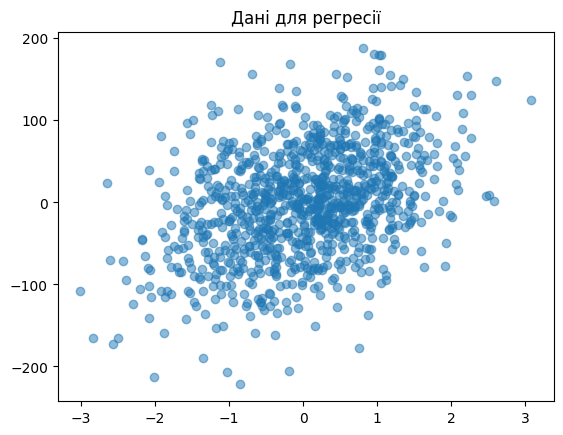

In [2]:

plt.scatter(X_reg[:,0], y_reg, alpha=0.5)
plt.title("Дані для регресії")
plt.show()


In [3]:

# Генерація даних для класифікації
X_clf, y_clf = make_classification(
    n_samples=1000,       # Number of samples
    n_features=12,        # Total number of features
    n_informative=10,     # Number of informative features
    n_redundant=0,        # Number of redundant features
    n_classes=6,          # Number of classes
    n_clusters_per_class=1,  # Clusters per class
    random_state=42       # Seed for reproducibility
)
y_clf.shape

(1000,)

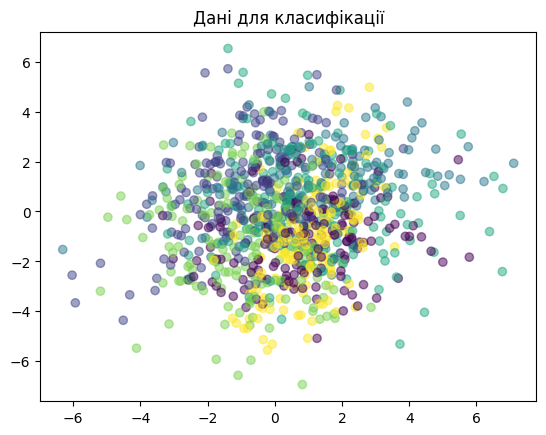

In [4]:
plt.scatter(X_clf[:, 0], X_clf[:, 1], c=y_clf, alpha=0.5, cmap='viridis')
plt.title("Дані для класифікації")
plt.show()


In [5]:
#%pip install tensorflow


In [6]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Розподіл даних для регресії
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
X_train_reg.shape

(800, 5)

In [7]:

# Побудова моделі регресії
model_reg = Sequential([
    Dense(64, activation='relu', input_shape=(5,)),
    Dense(64, activation='relu'),
    Dense(1)
])

model_reg.compile(optimizer='adam', loss='mse')
history =  model_reg.fit(X_train_reg, y_train_reg, epochs=50, batch_size=16, verbose=1)
history_reg = history.history

# Оцінка моделі
y_pred_reg = model_reg.predict(X_test_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Mean Squared Error: {mse}")


Epoch 1/50


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4876.7954 
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4384.7031
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3114.6157
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1290.9685
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 424.9472
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 306.9375
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 271.8334 
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 279.3848
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 274.8871
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 290.2618
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 250.5271
Epoch 12/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 291.0410
Epoch 13/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 265.6086
Epoch 14/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 283.9784
Epoch 15/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 293

Epoch 1/50


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2692 - loss: 1.7800 
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6258 - loss: 1.1406
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7249 - loss: 0.8259
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8079 - loss: 0.6850 
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8047 - loss: 0.6000
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8274 - loss: 0.5350
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8607 - loss: 0.4497 
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8700 - loss: 0.4157
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8762 - loss: 0.3808 
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9004 - loss: 0.3191 
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9121 - loss: 0.2971
Epoch 12/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9021 - loss: 0.

<function matplotlib.pyplot.xlabel(xlabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['left', 'center', 'right'] | None" = None, **kwargs) -> 'Text'>

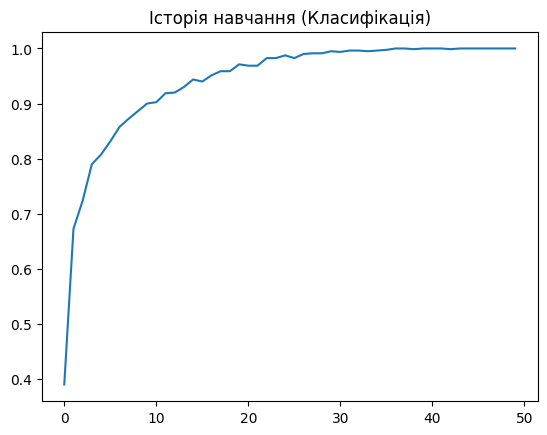

In [8]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

# Splitting the data
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# Build the classification model
model_clf = Sequential([
    Dense(64, activation='relu', input_shape=(12,)),  # Input shape matches feature count
    Dense(64, activation='relu'),
    Dense(6, activation='softmax')  # Output layer with 6 units for 6 classes
])

# Compile the model
model_clf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model_clf.fit(X_train_clf, y_train_clf, epochs=50, batch_size=16, verbose=1)
history_class = history.history

# Evaluate the model
y_pred_clf = np.argmax(model_clf.predict(X_test_clf), axis=1)  # Get the class predictions
accuracy = accuracy_score(y_test_clf, y_pred_clf)
conf_matrix = confusion_matrix(y_test_clf, y_pred_clf)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)

# Plot training accuracy
plt.plot(history_class['accuracy'], label='Train Accuracy')
plt.title('Історія навчання (Класифікація)')
plt.xlabel


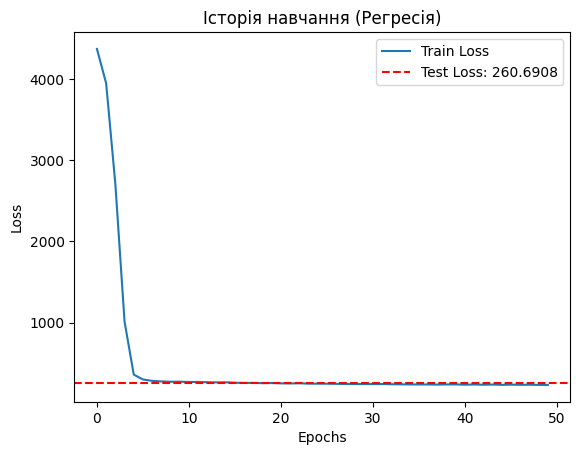

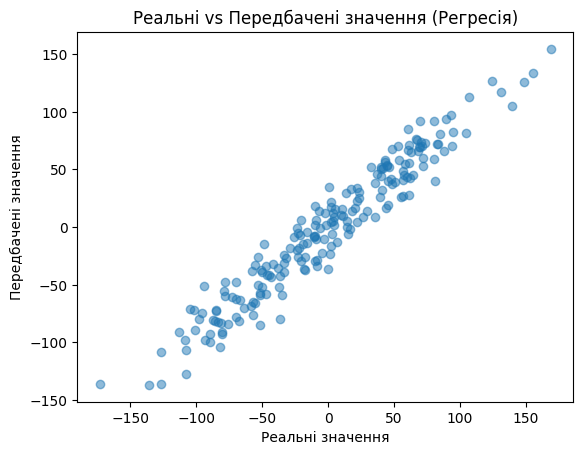

In [9]:

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Calculate the test loss
test_loss = mean_squared_error(y_test_reg, y_pred_reg)

# Visualize Training Loss
plt.plot(history_reg['loss'], label='Train Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label=f'Test Loss: {test_loss:.4f}')
plt.title('Історія навчання (Регресія)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualize Actual vs Predicted Values
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.title("Реальні vs Передбачені значення (Регресія)")
plt.xlabel("Реальні значення")
plt.ylabel("Передбачені значення")
plt.show()


In [10]:
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import mean_squared_error

class TestLossCallback(Callback):
    def __init__(self, test_data):
        self.test_data = test_data
        self.test_loss = []

    def on_epoch_end(self, epoch, logs=None):
        X_test, y_test = self.test_data
        y_pred = self.model.predict(X_test, verbose=0)
        loss = mean_squared_error(y_test, y_pred)
        self.test_loss.append(loss)


# Prepare test data
test_data = (X_test_reg, y_test_reg)

# Initialize the callback
test_loss_callback = TestLossCallback(test_data)

# Train the model with the callback
history_r2 = model_reg.fit(
    X_train_reg, y_train_reg,
    epochs=50,
    batch_size=16,
    callbacks=[test_loss_callback],
    verbose=1
)


Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 238.6692
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 247.4194
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 235.6789
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 240.8724
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 229.9919
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 215.6800
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 219.7188 
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 211.6252
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 225.8503
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 217.2113
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 218.5843
Epoch 12/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 230.5036
Epoch 13/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 251.2957
Epoch 14/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 215.5504
Epoch 15/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - los

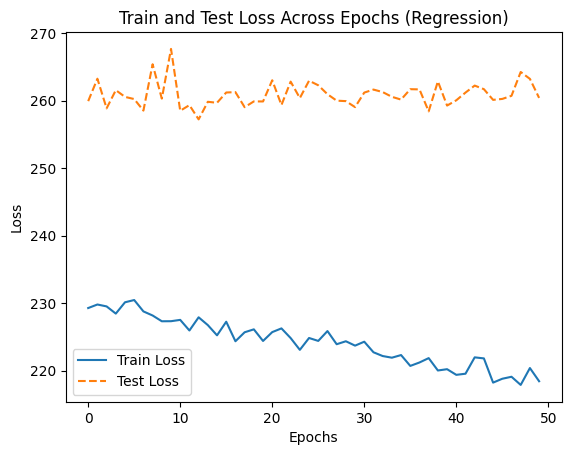

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


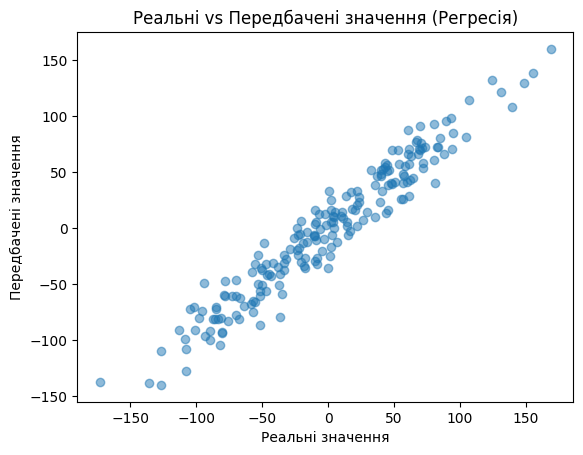

In [11]:
import matplotlib.pyplot as plt

# Extract training loss and test loss
train_loss = history_r2.history['loss']
test_loss = test_loss_callback.test_loss

# Plot both training and test loss
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss', linestyle='--')
plt.title('Train and Test Loss Across Epochs (Regression)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualize Actual vs Predicted Values
y_pred_reg = model_reg.predict(X_test_reg)
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.title("Реальні vs Передбачені значення (Регресія)")
plt.xlabel("Реальні значення")
plt.ylabel("Передбачені значення")
plt.show()


In [12]:
#%pip install seaborn

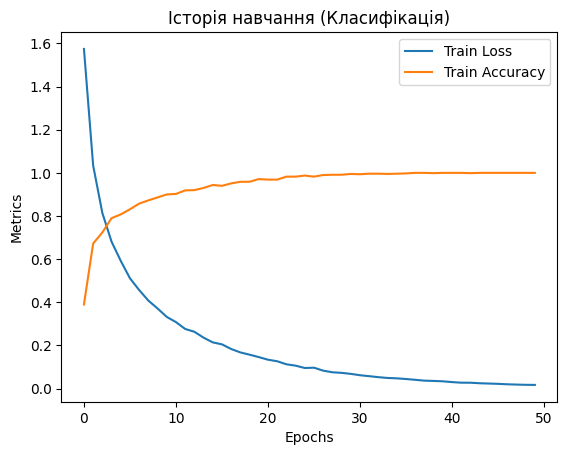

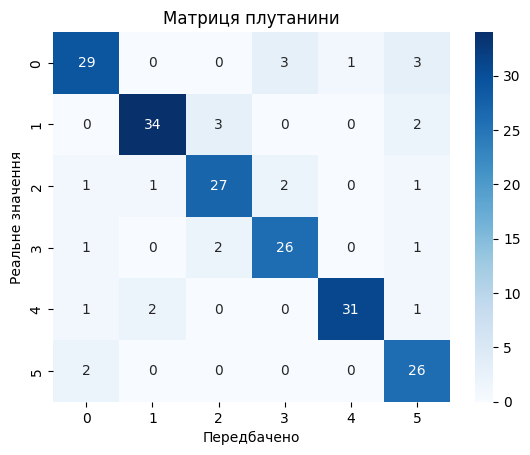

In [13]:

# Візуалізація історії навчання класифікації
history_clf = history_class

plt.plot(history_clf['loss'], label='Train Loss')
plt.plot(history_clf['accuracy'], label='Train Accuracy')
plt.title('Історія навчання (Класифікація)')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.show()

# Матриця плутанини у вигляді графіка
import seaborn as sns

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Матриця плутанини")
plt.xlabel("Передбачено")
plt.ylabel("Реальне значення")
plt.show()
